# The Exploration Problem:

In this exploration, I seek an answer for the question: "By only using features that are not explicitly related to geography or a function of geography, is it possible that we could find the location of a city in the world? If yes, how precise can I get? (A region? Country? Coordinates?)

To be able to explore this question, first we naturally need the target locations. Below using geopy I enrich the dataset by city center coordinates. Since the process takes a while I saved the resulting dataset and the notebook starts after the location data for each city is obtained.


In [1]:
# Default imports.
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
from   time import sleep

In [ ]:
# geolocator = Nominatim(user_agent="user_agent")
# location = geolocator.geocode("Aurora, Colorado") # Melbourne
# # print(location.address)
# lat_long = (location.latitude, location.longitude)
# print(lat_long[0], lat_long[1])

# # Below is a function that cleans the city names in a way that geopy can understand.
# # Then using geopy the database is enriched by coordinate values.

# def add_coordinates(city):
#     """
#     This functon will add long. lat. coordinates for each city as a new column
#     """

#     if city != str:
#         city = str(city)
#     if city == "Baltimore(MD)":
#         city = "Baltimore"
#     if city == "Birmingham(AL)":
#         city = "Birmingham"
#     if city == "Valencia(VZL)":
#         city = "Valencia"
#     if city == "Tampa-St. Petersburg(FL)":
#         city = "St. Petersburg, Florida"
#     if city == "Denver-Aurora(CO)":
#         city = "Aurora, Colorado"
#     geolocator = Nominatim(user_agent="user_agent")
# #     print(city)
#     while True:
#         try:
#             location = geolocator.geocode(city)
#             break
#         except:
#             continue
    
#     if type(location)!=type(None):
#         lat_long = (location.latitude, location.longitude)
#     else:
#         lat_long = np.nan
#     return lat_long 
#     ### your code


#     # print(location.address)

# df = pd.read_pickle('df_new.pkl')
# df = df.drop(['Month', 'Day', 'Year'], axis=1) # Drop unnecessary columns (full NaNs)
# df['Location'] = df['City'].apply(add_coordinates)



## Preparing the Data:

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('location_from_pickle.csv')
df.describe()

,Unnamed: 0,cityID,clusterID,Car Modeshare (%),Public Transit Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),...,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor,AvgTemperature,Temperature,Humidity
count,332.000000,332.000000,332.000000,268.000000,269.000000,255.000000,332.000000,331.000000,332.000000,332.000000,...,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,111.000000,332.000000,332.000000
mean,165.500000,165.801205,5.578313,45.611819,28.133913,17.510196,1.056024,14.674622,39.041416,0.038099,...,0.398885,0.417877,0.382575,0.171293,0.491230,0.492131,0.412452,56.055856,8.618614,74.870482
std,95.984374,95.619666,3.591263,27.787198,20.310731,14.842958,0.425800,8.726269,77.236480,0.068863,...,0.078519,0.266415,0.153237,0.159287,0.189169,0.227305,0.151724,23.389997,11.769086,20.120290
min,0.000000,1.000000,1.000000,0.000000,0.400000,0.000000,0.010000,0.600000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-24.900000,12.000000
25%,82.750000,83.750000,2.000000,21.525000,11.000000,3.200000,0.707500,7.500000,0.000000,0.000000,...,0.358622,0.215262,0.281454,0.055493,0.364674,0.308533,0.320159,42.100000,-0.700000,65.000000
50%,165.500000,165.500000,6.000000,38.000000,28.000000,17.000000,1.055000,13.900000,0.000000,0.000000,...,0.390940,0.342730,0.341291,0.119005,0.533161,0.469138,0.394086,57.500000,7.915000,80.000000
75%,248.250000,248.250000,8.000000,68.775000,42.000000,26.200000,1.322500,20.400000,42.825000,0.053334,...,0.423659,0.707410,0.451648,0.248133,0.640700,0.679300,0.474605,74.200000,17.637500,88.000000
max,331.000000,331.000000,12.000000,94.800000,82.500000,78.000000,2.120000,37.200000,588.000000,0.612982,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,30.450000,100.000000


Above you can see the main statistical features for each column. The dataset consists of 332 cities as it is right now. Since I saved the coordinates in a formatted string in a single column in the dataframe, first I parse them into two different **float** columns, namely: 'Latitude' and 'Longitude'.

In [3]:
regions = pd.read_csv('country_region.csv')[['Country','Region']]
df = pd.merge(df, regions, on='Country', how='inner')

def get_lat(x):
    return float(x.split(',')[0][1:])
def get_lon(x):
    return float(x.split(',')[1][:-1])

df = df[~df['Location'].isnull()] # To make sure that there's no null values amongst that geopy returned.

df['Latitude'] = df['Location'].apply(get_lat)
df['Longitude'] = df['Location'].apply(get_lon)
df[['Region', 'Latitude', 'Longitude']].head(3)

,Region,Latitude,Longitude
0,North America,39.290882,-76.610759
1,North America,43.034993,-87.922497
2,North America,30.271129,-97.743700


In [4]:
from sklearn.preprocessing import LabelEncoder

def multi_label_encoder(df, cols2code):
        encoder = LabelEncoder()
        for col in cols2code:
            df[col+'(Encoded)'] = encoder.fit_transform(df[col])
        return df
    
df = multi_label_encoder(df, ['Region', 'Country'])
df.head()

,Unnamed: 0,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),...,AvgTemperature,coordinates,Temperature,Humidity,Location,Region,Latitude,Longitude,Region(Encoded),Country(Encoded)
0,0,Baltimore(MD),285.0,7.0,Auto Sprawl,United States,85.0,6.1,0.3,2.6,...,NaN,"(39.2908816, -76.610759)",7.34,82,"(39.2908816, -76.610759)",North America,39.290882,-76.610759,5,105
1,5,Milwaukee(WI),297.0,7.0,Auto Sprawl,United States,88.6,3.6,0.5,2.7,...,NaN,"(43.0349931, -87.922497)",-9.69,54,"(43.0349931, -87.922497)",North America,43.034993,-87.922497,5,105
2,13,Austin(TX),301.0,7.0,Auto Sprawl,United States,86.8,2.6,0.8,1.8,...,NaN,"(30.2711286, -97.7436995)",-1.02,34,"(30.2711286, -97.7436995)",North America,30.271129,-97.743700,5,105
3,18,Chicago(IL),269.0,8.0,Auto Innovative,United States,78.0,12.0,0.7,3.1,...,NaN,"(41.8755616, -87.6244212)",-8.07,63,"(41.8755616, -87.6244212)",North America,41.875562,-87.624421,5,105
4,40,Atlanta(GA),273.0,8.0,Auto Innovative,United States,86.8,3.1,0.3,1.3,...,NaN,"(33.6238152, -84.1693827)",2.43,74,"(33.6238152, -84.1693827)",North America,33.623815,-84.169383,5,105


Now, the dataset is ready to be investigated. First things first, I perform a percentage based check to see which columns are missing how many values compared to the total number of rows in the dataset. If particular columns are missing relatively too large number of values, it's better considering dropping them instead of trying to impute the values inside.

In [5]:
temp_df = pd.DataFrame(df.isnull().sum(axis=0), columns=['Missing Values'])/df.count()[0]*100 
temp_df = temp_df.sort_values(by=temp_df.columns[0], ascending=False)
pd.set_option('display.max_rows', 1000)
temp_df.head(5)

,Missing Values
AvgTemperature,67.441860
Traffic Index,55.149502
Inefficiency Index,55.149502
Travel Time Index,55.149502
Congestion PM Peak (%),47.840532


Inspecting the outputs from the cell above, it's clear to see that many columns have really large number of values missing. It is not an intuitive approach trying to impute them statistically. It seems more feasible to drop them. 

Since there is no golden rule for choosing how to perform such operation, I decided on filtering out all the columns that are missing more than 25% of it's values. 

In [6]:
cols2drop = temp_df[temp_df['Missing Values']>=25].index
df = df.drop(cols2drop, axis=1).drop('Unnamed: 0', axis=1).drop('coordinates', axis=1)
df.head(3)

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),...,Sprawl Factor,Network Density Factor,Temperature,Humidity,Location,Region,Latitude,Longitude,Region(Encoded),Country(Encoded)
0,Baltimore(MD),285.0,7.0,Auto Sprawl,United States,85.0,6.1,2.6,0.66,8.5,...,0.722163,0.425187,7.34,82,"(39.2908816, -76.610759)",North America,39.290882,-76.610759,5,105
1,Milwaukee(WI),297.0,7.0,Auto Sprawl,United States,88.6,3.6,2.7,0.64,9.8,...,0.680911,0.582846,-9.69,54,"(43.0349931, -87.922497)",North America,43.034993,-87.922497,5,105
2,Austin(TX),301.0,7.0,Auto Sprawl,United States,86.8,2.6,1.8,0.60,12.8,...,0.765455,0.379809,-1.02,34,"(30.2711286, -97.7436995)",North America,30.271129,-97.743700,5,105


## Feature Selection: 

Now, instead of trying to impute values for the remaining columns, first I perform a correlation check between the coordinates and the Latitude/Longitude values - as a smart way of feature selection. I use absolute value of correlation because the important aspect is the magnitude of the correlation to explain a change in a variable compared to another one.

In [7]:
pd.set_option('display.max_rows', 1000)
corr_Lat = abs(pd.DataFrame(df.corr()['Latitude'])).sort_values(by='Latitude', ascending=False)
corr_Lat.head(10)

,Latitude
Latitude,1.000000
Temperature,0.669497
clusterID,0.496319
Road Deaths Rate (per 1000),0.494275
Life Expectancy (years),0.460763
GDP per Capita (USD),0.458740
Digital Penetration,0.458065
Development Factor,0.433200
Internet Penetration,0.404412
CO2 Emissions per Capita (metric tonnes),0.399059


In [8]:
pd.set_option('display.max_rows', 1000)
corr_Lon = abs(pd.DataFrame(df.corr()['Longitude'])).sort_values(by='Longitude', ascending=False)
corr_Lon.head(10)

,Longitude
Longitude,1.000000
Region(Encoded),0.686697
Car Modeshare (%),0.538104
Urbanization Rate Change 2015 – 2025 (pp),0.525583
Urbanization Rate 2015 (%),0.437028
Sustainability Factor,0.433833
Congestion Factor,0.430325
Population Factor,0.429835
Walking Modeshare (%),0.389066
Development Factor,0.380073


Interestingly, if you see the index of the outputs above, the features that the latitude and longitude values depend on the highest are completely different. Lattitude being correlated to the average temperature on 30th of November is quite logical. However, the other features do not represent a direct relation to longitude or latitude.

## Region Analysis:

In [9]:
from sklearn.model_selection import train_test_split

df_reg = df[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'Digital Penetration', 'Car Modeshare (%)', 'Life Expectancy (years)', \
         'Region(Encoded)']].dropna()

X = df_reg[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'Digital Penetration', 'Car Modeshare (%)', 'Life Expectancy (years)']].values

y = df_reg['Region(Encoded)'].values

X_norm = (X - np.mean(X))/np.std(X) # Normalize values so we get better results!

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=42)


In [10]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 600, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap} 

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   17.7s finished


0.8688524590163934

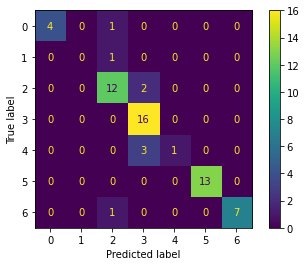

In [12]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

# Can we classify based on country??


In [13]:
from sklearn.model_selection import train_test_split

df_country = df[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'Digital Penetration', 'Car Modeshare (%)', 'Life Expectancy (years)', \
         'Country(Encoded)', 'Country']].dropna()

X = df_country[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'Digital Penetration', 'Car Modeshare (%)', 'Life Expectancy (years)']].values

y = df_country['Country(Encoded)'].values

X_norm = (X - np.mean(X))/np.std(X) # Normalize values so we get better results!

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.30, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.684931506849315

## Training a Neural-Network for Coordinates Prediction

By seeing the correlation results above, I decided to use 6 features in total:
* 3 features that are correlated to Latitude the most (which are not directly related with geography).
* 3 features that are correlated to Longitude the most (which are not directly related with geography).

The chosen features are: Road Deaths Rate (per 1000), Digital Penetration, Life Expectancy (years), Car Modeshare (%), Urbanization Rate Change 2015 – 2025 (pp), Congestion Factor. 	

In [15]:
from sklearn.model_selection import train_test_split

df_nn = df[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'Digital Penetration', 'Car Modeshare (%)', 'Life Expectancy (years)', \
         'Latitude', 'Longitude']].dropna()

X = df_nn[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'Digital Penetration', 'Car Modeshare (%)', 'Life Expectancy (years)']].values

y = df_nn[['Latitude', 'Longitude']].values

X_norm = (X - np.mean(X))/np.std(X) # Normalize values so we get better results!

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=np.shape(X_train)[1], activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(2, activation='linear')) # Output layer.


# compile the keras model
opt = Adam(learning_rate=1e-2)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=150, batch_size=64, verbose=1, validation_split=0.25) # Do not print the progress since 3500 epochs.

Epoch 1/150
2/2 [==============================] - 0s 55ms/step - loss: 4058.8125 - mean_squared_error: 4058.8125 - val_loss: 2669.6992 - val_mean_squared_error: 2669.6992
Epoch 2/150
2/2 [==============================] - 0s 7ms/step - loss: 3870.0254 - mean_squared_error: 3870.0254 - val_loss: 2528.5745 - val_mean_squared_error: 2528.5745
Epoch 3/150
2/2 [==============================] - 0s 8ms/step - loss: 3671.9255 - mean_squared_error: 3671.9255 - val_loss: 2409.2234 - val_mean_squared_error: 2409.2234
Epoch 4/150
2/2 [==============================] - 0s 7ms/step - loss: 3522.3384 - mean_squared_error: 3522.3384 - val_loss: 2305.8967 - val_mean_squared_error: 2305.8967
Epoch 5/150
2/2 [==============================] - 0s 7ms/step - loss: 3372.2559 - mean_squared_error: 3372.2559 - val_loss: 2218.9163 - val_mean_squared_error: 2218.9163
Epoch 6/150
2/2 [==============================] - 0s 7ms/step - loss: 3224.0684 - mean_squared_error: 3224.0684 - val_loss: 2158.8655 - val_mea

Epoch 49/150
2/2 [==============================] - 0s 7ms/step - loss: 1854.7490 - mean_squared_error: 1854.7490 - val_loss: 1983.4397 - val_mean_squared_error: 1983.4397
Epoch 50/150
2/2 [==============================] - 0s 6ms/step - loss: 1849.0789 - mean_squared_error: 1849.0789 - val_loss: 1971.3241 - val_mean_squared_error: 1971.3241
Epoch 51/150
2/2 [==============================] - 0s 7ms/step - loss: 1835.1125 - mean_squared_error: 1835.1125 - val_loss: 1919.4242 - val_mean_squared_error: 1919.4242
Epoch 52/150
2/2 [==============================] - 0s 7ms/step - loss: 1830.4795 - mean_squared_error: 1830.4795 - val_loss: 1921.4929 - val_mean_squared_error: 1921.4929
Epoch 53/150
2/2 [==============================] - 0s 7ms/step - loss: 1866.7954 - mean_squared_error: 1866.7954 - val_loss: 1948.4438 - val_mean_squared_error: 1948.4438
Epoch 54/150
2/2 [==============================] - 0s 6ms/step - loss: 1846.0902 - mean_squared_error: 1846.0902 - val_loss: 2016.7623 - va

2/2 [==============================] - 0s 7ms/step - loss: 1552.4479 - mean_squared_error: 1552.4479 - val_loss: 1657.8750 - val_mean_squared_error: 1657.8750
Epoch 97/150
2/2 [==============================] - 0s 6ms/step - loss: 1539.2122 - mean_squared_error: 1539.2122 - val_loss: 1611.4742 - val_mean_squared_error: 1611.4742
Epoch 98/150
2/2 [==============================] - 0s 7ms/step - loss: 1520.0266 - mean_squared_error: 1520.0266 - val_loss: 1636.9036 - val_mean_squared_error: 1636.9036
Epoch 99/150
2/2 [==============================] - 0s 7ms/step - loss: 1501.1969 - mean_squared_error: 1501.1969 - val_loss: 1663.8141 - val_mean_squared_error: 1663.8141
Epoch 100/150
2/2 [==============================] - 0s 7ms/step - loss: 1506.7526 - mean_squared_error: 1506.7526 - val_loss: 1676.8743 - val_mean_squared_error: 1676.8743
Epoch 101/150
2/2 [==============================] - 0s 7ms/step - loss: 1489.3445 - mean_squared_error: 1489.3445 - val_loss: 1635.4803 - val_mean_squa

2/2 [==============================] - 0s 7ms/step - loss: 1181.5980 - mean_squared_error: 1181.5980 - val_loss: 1345.8478 - val_mean_squared_error: 1345.8478
Epoch 144/150
2/2 [==============================] - 0s 7ms/step - loss: 1163.7914 - mean_squared_error: 1163.7914 - val_loss: 1333.0499 - val_mean_squared_error: 1333.0499
Epoch 145/150
2/2 [==============================] - 0s 6ms/step - loss: 1168.2505 - mean_squared_error: 1168.2505 - val_loss: 1318.3127 - val_mean_squared_error: 1318.3127
Epoch 146/150
2/2 [==============================] - 0s 7ms/step - loss: 1171.7074 - mean_squared_error: 1171.7074 - val_loss: 1315.6444 - val_mean_squared_error: 1315.6444
Epoch 147/150
2/2 [==============================] - 0s 6ms/step - loss: 1188.3257 - mean_squared_error: 1188.3257 - val_loss: 1306.8092 - val_mean_squared_error: 1306.8092
Epoch 148/150
2/2 [==============================] - 0s 7ms/step - loss: 1145.2623 - mean_squared_error: 1145.2623 - val_loss: 1321.7094 - val_mean_s

In [17]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

32.97340294607945

In [18]:
or_df = pd.read_csv('location_from_pickle.csv')
izmir = or_df[or_df['City']=='Copenhagen'][['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'Digital Penetration', 'Car Modeshare (%)', 'Life Expectancy (years)']].values
izmir_norm = (izmir - np.mean(X))/np.std(X)

In [22]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='user_agent')

coord = model.predict(izmir_norm)
try: 
    location = geolocator.reverse(coord)
    print(location)
except:
    print('There happened a problem reverse encoding the location.')
    print('The coordinates might not be on any land: {}'.format(coord))

There happened a problem reverse encoding the location.
The coordinates might not be on any land: [[36.079086 28.69933 ]]


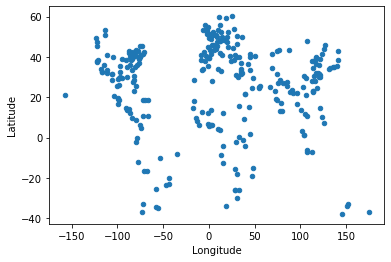

In [23]:
df.plot.scatter(x='Longitude', y='Latitude')

In [24]:
pred = pd.DataFrame(y_pred, columns=['Latitude', 'Longitude'])
true = pd.DataFrame(y_test, columns=['Latitude', 'Longitude'])
from matplotlib import pyplot as plt

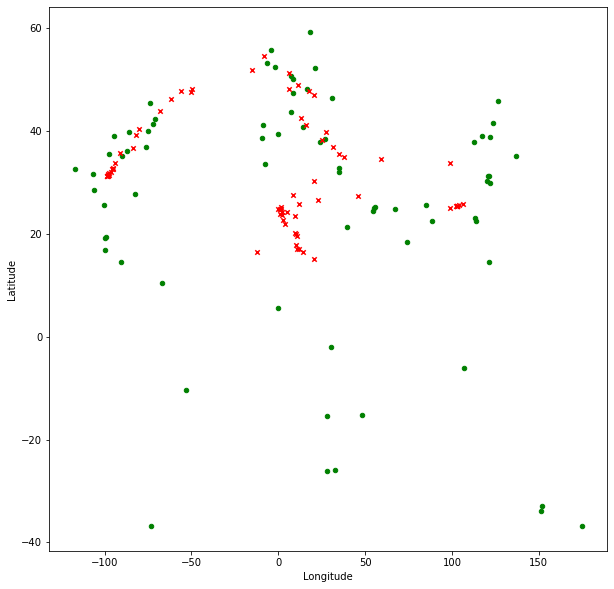

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
true.plot.scatter(x='Longitude', y='Latitude', marker='o', color='g', ax=ax)
pred.plot.scatter(x='Longitude', y='Latitude', marker='x', color='r', ax=ax)
